In [10]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("Data/최종_데이터.csv", encoding="cp949")

# 날짜형으로 변환
df["기준년월"] = pd.to_datetime(df["기준년월"], format="%Y%m")

# 결측치 제거 (시도/시군구만 존재)
df = df.dropna(subset=["사업장_시도", "사업장_시군구"])
df

,기준년월,업종_대분류,업종_중분류,사업장_시도,사업장_시군구,법인_고객등급,전담고객여부,요구불예금잔액,거치식예금잔액,적립식예금잔액,...,여신_시설자금대출좌수,신용카드개수,외환_수출실적거래건수,외환_수입실적거래건수,창구거래건수,인터넷뱅킹거래건수,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수
0,2024-12-01,건설업,종합 건설업,대구광역시,서구,일반,N,0.16,0.0,0.0,...,0개,10개초과 20개이하,0건,0건,0건,0건,2건초과 5건이하,0건,0건,10건초과 20건이하
1,2024-12-01,건설업,종합 건설업,대구광역시,서구,일반,N,0.03,0.0,0.0,...,0개,0개,0건,0건,0건,0건,0건,0건,0건,0건
2,2024-12-01,건설업,종합 건설업,대전광역시,서구,우수,N,0.24,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,0건,50건 초과,0건,0건,0건,20건초과 30건이하
3,2024-12-01,건설업,종합 건설업,대구광역시,서구,우수,Y,180.00,0.0,0.0,...,0개,0개,0건,0건,2건초과 5건이하,20건초과 30건이하,0건,0건,0건,5건초과 10건이하
4,2024-12-01,건설업,종합 건설업,대구광역시,서구,우수,Y,41.00,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,1건,10건초과 20건이하,0건,0건,0건,20건초과 30건이하
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347294,2022-03-01,제조업,금속가공제품 제조업; 기계 및 가구 제외,대구광역시,북구,일반,N,0.02,0.0,0.0,...,0개,0개,0건,0건,0건,1건,0건,0건,2건,0건
347295,2022-03-01,정보통신업,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",대구광역시,중구,일반,N,0.01,0.0,0.0,...,0개,0개,0건,0건,2건초과 5건이하,0건,0건,0건,2건,1건
347296,2022-03-01,도매 및 소매업,소매업; 자동차 제외,경상남도,양산시,일반,Y,11.00,0.0,0.0,...,0개,2개,0건,0건,0건,40건초과 50건이하,0건,0건,0건,30건초과 40건이하
347297,2022-03-01,부동산업,부동산업,경상북도,경주시,일반,Y,21.00,0.0,0.0,...,2개초과 5개이하,0개,0건,0건,2건,2건초과 5건이하,0건,0건,0건,0건


In [11]:
# 전체 채널 거래금액 합계
df["총_채널거래금액"] = (
    df["창구거래금액"] +
    df["인터넷뱅킹거래금액"] +
    df["스마트뱅킹거래금액"] +
    df["폰뱅킹거래금액"] +
    df["ATM거래금액"]
)

# 디지털 채널 비율
df["디지털채널비율"] = (
    (df["인터넷뱅킹거래금액"] + df["스마트뱅킹거래금액"] + df["폰뱅킹거래금액"]) /
    df["총_채널거래금액"].replace(0, np.nan)
)

# ATM 비율, 창구 비율
df["ATM비율"] = df["ATM거래금액"] / df["총_채널거래금액"].replace(0, np.nan)
df["창구비율"] = df["창구거래금액"] / df["총_채널거래금액"].replace(0, np.nan)

## 업종별 디지털화 추이 시각화

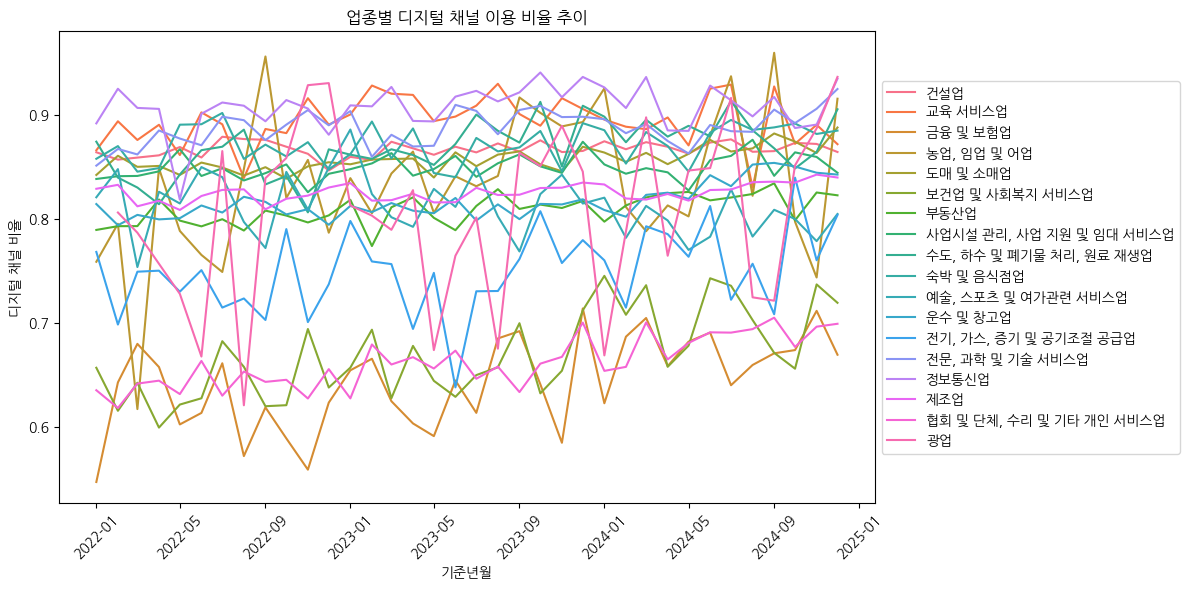

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 업종별 디지털 채널 이용 비율 추이
digital_trend = df.groupby(["기준년월", "업종_대분류"])["디지털채널비율"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=digital_trend, x="기준년월", y="디지털채널비율", hue="업종_대분류")
plt.title("업종별 디지털 채널 이용 비율 추이")
plt.ylabel("디지털 채널 비율")
plt.xlabel("기준년월")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## 군집 분석 KMeans

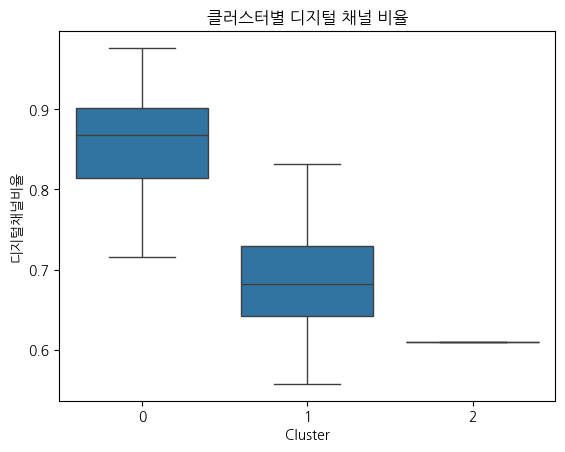

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 특정 기준년월로 필터링 (예: 가장 최근)
latest_month = df["기준년월"].max()
df_latest = df[df["기준년월"] == latest_month].copy()

# 업종별 평균 디지털 채널 이용 비율, 예금/대출 등
agg_cols = [
    "디지털채널비율", "요구불예금잔액", "거치식예금잔액", "적립식예금잔액",
    "여신_운전자금대출잔액", "여신_시설자금대출잔액", "신용카드사용금액"
]
df_agg = df_latest.groupby("업종_중분류")[agg_cols].mean()

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agg)

# 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_agg["Cluster"] = kmeans.fit_predict(X_scaled)

# 시각화
sns.boxplot(data=df_agg, x="Cluster", y="디지털채널비율")
plt.title("클러스터별 디지털 채널 비율")
plt.show()

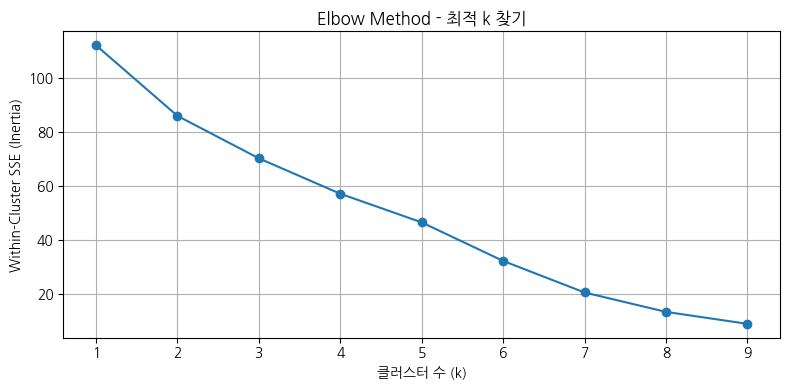

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import zscore

# ① 최신 기준년월 데이터만 필터링
df["기준년월"] = pd.to_datetime(df["기준년월"], format="%Y%m")
latest = df["기준년월"].max()
df_latest = df[df["기준년월"] == latest].copy()

# ② 디지털채널비율 파생
df_latest["총_채널거래금액"] = (
    df_latest["창구거래금액"] + df_latest["인터넷뱅킹거래금액"] +
    df_latest["스마트뱅킹거래금액"] + df_latest["폰뱅킹거래금액"] + df_latest["ATM거래금액"]
)

df_latest["디지털채널비율"] = (
    (df_latest["인터넷뱅킹거래금액"] + df_latest["스마트뱅킹거래금액"] + df_latest["폰뱅킹거래금액"]) /
    df_latest["총_채널거래금액"].replace(0, np.nan)
)

# ③ 업종 대분류별 집계
agg_cols = [
    "디지털채널비율", "요구불예금잔액", "거치식예금잔액", "적립식예금잔액",
    "여신_운전자금대출잔액", "여신_시설자금대출잔액", "신용카드사용금액"
]
df_agg = df_latest.groupby("업종_대분류")[agg_cols].mean().dropna()

# ④ 이상치 제거 (Z-score 기준 완화)
z_scores = np.abs(zscore(df_agg))
df_agg_clean = df_agg[(z_scores < 2.5).all(axis=1)]

# ⑤ 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agg_clean)

# ⑥ Elbow Method 수행
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# ⑦ 시각화
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method - 최적 k 찾기")
plt.xlabel("클러스터 수 (k)")
plt.ylabel("Within-Cluster SSE (Inertia)")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


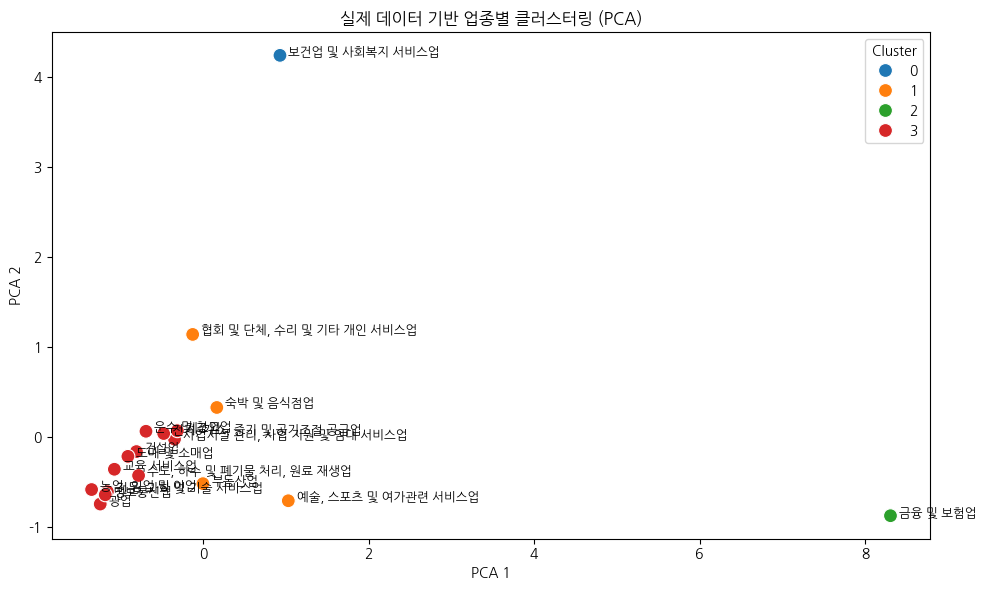

In [42]:
# 이 셀만 실행하면 바로 분석 가능
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 최신 기준년월 데이터 추출
df["기준년월"] = pd.to_datetime(df["기준년월"], format="%Y%m")
latest = df["기준년월"].max()
df_latest = df[df["기준년월"] == latest].copy()

# 디지털 채널 비율 파생
df_latest["총_채널거래금액"] = (
    df_latest["창구거래금액"] +
    df_latest["인터넷뱅킹거래금액"] +
    df_latest["스마트뱅킹거래금액"] +
    df_latest["폰뱅킹거래금액"] +
    df_latest["ATM거래금액"]
)

df_latest["디지털채널비율"] = (
    (df_latest["인터넷뱅킹거래금액"] + df_latest["스마트뱅킹거래금액"] + df_latest["폰뱅킹거래금액"]) /
    df_latest["총_채널거래금액"].replace(0, np.nan)
)

# 업종별 집계
agg_cols = [
    "디지털채널비율", "요구불예금잔액", "거치식예금잔액", "적립식예금잔액",
    "여신_운전자금대출잔액", "여신_시설자금대출잔액", "신용카드사용금액"
]
df_agg = df_latest.groupby("업종_대분류")[agg_cols].mean().dropna()

# 표준화 및 클러스터링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agg)

kmeans = KMeans(n_clusters=4, random_state=42)
df_agg["Cluster"] = kmeans.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_agg["PCA1"] = X_pca[:, 0]
df_agg["PCA2"] = X_pca[:, 1]

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=100)
for i, txt in enumerate(df_agg.index):
    plt.annotate(txt, (df_agg["PCA1"][i]+0.1, df_agg["PCA2"][i]), fontsize=9)
plt.title("실제 데이터 기반 업종별 클러스터링 (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [26]:
cluster_summary = df_agg.groupby("Cluster").mean()
display(cluster_summary)

,디지털채널비율,요구불예금잔액,거치식예금잔액,적립식예금잔액,여신_운전자금대출잔액,여신_시설자금대출잔액,신용카드사용금액,PCA1,PCA2
Cluster,,,,,,,,,
0,0.719123,1050.470588,346.161765,38.676471,241.514706,441.029412,25.745882,0.929752,4.244064
1,0.802648,143.717575,43.232775,5.053230,1247.564741,2382.439690,5.418915,0.267677,0.059567
2,0.669208,4166.320096,39214.519231,0.000000,6158.160577,3399.519231,72.376731,8.306169,-0.876162
3,0.880759,125.148549,44.883756,1.550175,444.755570,392.144609,6.498461,-0.858886,-0.300514


In [31]:
df_agg.groupby("Cluster")["디지털채널비율"].mean()

Cluster
0    0.719123
1    0.802648
2    0.669208
3    0.880759
Name: 디지털채널비율, dtype: float64

In [27]:
for c in sorted(df_agg["Cluster"].unique()):
    print(f"\n[Cluster {c}]")
    print(df_agg[df_agg["Cluster"] == c].index.tolist())


[Cluster 0]
['보건업 및 사회복지 서비스업']

[Cluster 1]
['부동산업', '숙박 및 음식점업', '예술, 스포츠 및 여가관련 서비스업', '협회 및 단체, 수리 및 기타 개인 서비스업']

[Cluster 2]
['금융 및 보험업']

[Cluster 3]
['건설업', '광업', '교육 서비스업', '농업, 임업 및 어업', '도매 및 소매업', '사업시설 관리, 사업 지원 및 임대 서비스업', '수도, 하수 및 폐기물 처리, 원료 재생업', '운수 및 창고업', '전기, 가스, 증기 및 공기조절 공급업', '전문, 과학 및 기술 서비스업', '정보통신업', '제조업']


## 디지털 전환 유형 분류 모델 구축 (RandomForest)

In [33]:
print(df["디지털전환라벨"].value_counts(normalize=True))

디지털전환라벨
0    0.63889
1    0.36111
Name: proportion, dtype: float64


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 전처리: 카테고리형 인코딩
df["전담고객여부"] = df["전담고객여부"].map({'Y':1, 'N':0})
df["법인_고객등급"] = LabelEncoder().fit_transform(df["법인_고객등급"])

# 파생변수
df["총_채널거래금액"] = (
    df["창구거래금액"] + df["인터넷뱅킹거래금액"] +
    df["스마트뱅킹거래금액"] + df["폰뱅킹거래금액"] + df["ATM거래금액"]
)

df["디지털채널비율"] = (
    (df["인터넷뱅킹거래금액"] + df["스마트뱅킹거래금액"] + df["폰뱅킹거래금액"]) /
    df["총_채널거래금액"].replace(0, np.nan)
)

# 예: 디지털채널비율 상위 30% = 디지털전환형 (1), 나머지 = 전통형 (0)
threshold = df["디지털채널비율"].quantile(0.7)
df["디지털전환라벨"] = (df["디지털채널비율"] >= threshold).astype(int)

# 입력 변수
features = [
    "요구불예금잔액", "여신_운전자금대출잔액", "신용카드사용금액",
    "전담고객여부", "법인_고객등급", "총_채널거래금액"
]
X = df[features]
y = df["디지털전환라벨"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# class_weight 적용
model = RandomForestClassifier(max_depth=5, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.59      0.71     52723
           1       0.54      0.86      0.67     29800

    accuracy                           0.69     82523
   macro avg       0.71      0.73      0.69     82523
weighted avg       0.76      0.69      0.69     82523



In [36]:
import xgboost as xgb
from sklearn.metrics import classification_report

# DMatrix로 변환하지 않고 sklearn API 사용
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=(y == 0).sum() / (y == 1).sum()  # 클래스 불균형 보정
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classification Report")
print(classification_report(y_test, xgb_pred))

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.87      0.68      0.76     52723
           1       0.59      0.82      0.69     29800

    accuracy                           0.73     82523
   macro avg       0.73      0.75      0.72     82523
weighted avg       0.77      0.73      0.73     82523



In [37]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    is_unbalance=True  # 자동으로 클래스 불균형 고려
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

print("LightGBM Classification Report")
print(classification_report(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 89399, number of negative: 158169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 247568, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361109 -> initscore=-0.570555
[LightGBM] [Info] Start training from score -0.570555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga